<a href="https://colab.research.google.com/github/sahay-46/shruti_ranjan/blob/main/Lab8_2348545.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the data
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/spam.csv')
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<BarContainer object of 2 artists>

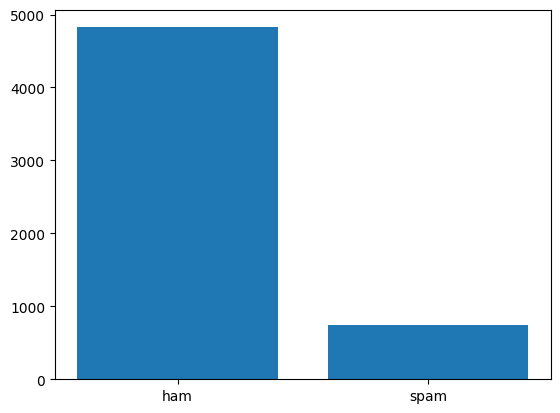

In [ ]:
#plotting the distribution
import matplotlib.pyplot as plt
plt.bar(data['v1'].unique(),data['v1'].value_counts())

In [ ]:
#Assigning nominal data numeric values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['v1']=le.fit_transform(data['v1'])
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#splitting the data for training and testing
from sklearn.model_selection import train_test_split
X=data['v2']
Y=data['v1']
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 2, test_size = 0.2)

In [ ]:
#Converting a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_train_vectorized.toarray().shape

(4457, 42648)

In [ ]:
#fitting the multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=1)
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(vectorizer.transform(X_test))

In [ ]:
#generating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[954,   3],
       [ 22, 136]])

<Axes: >

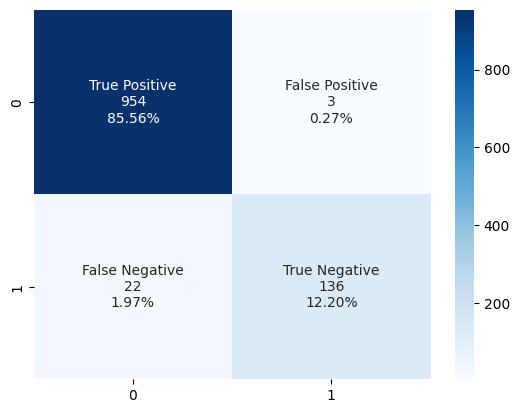

In [ ]:
#plotting the confusion matrix
import numpy as np
import seaborn as sns
labels=group_names=['True Positive','False Positive','False Negative','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
         zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

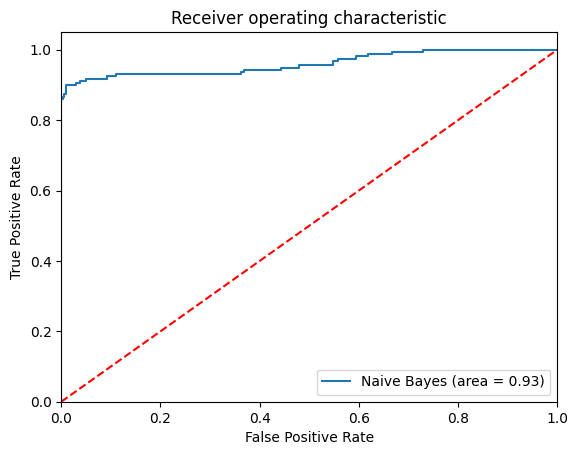

In [ ]:
#plotting the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(vectorizer.transform(X_test))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

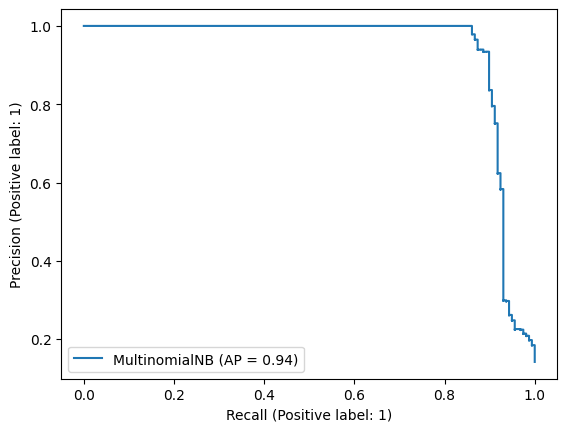

In [ ]:
#plotting the precision recall curve
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, vectorizer.transform(X_test), y_test)
plt.show ()

In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))
print("ROC_AUC:",roc_auc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       957
           1       0.98      0.86      0.92       158

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Test data accuracy: 0.9775784753363229
ROC_AUC: 0.9288123487163208
